In [38]:
import pandas as pd
import seaborn as sns
import re

In [39]:
df=pd.read_csv(r'D:\Datasets\stock_data.csv')

In [40]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [41]:
#remove punctuations
for i in range(0, len(df)):
     df.replace("[^a-zA-Z]"," ",regex=True,inplace=True)
     

In [42]:
df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user AAP MOVIE return for the FEA GEED i...,1
2,user I d be afraid to short AMZN they are lo...,1
3,MNTA Over,1
4,OI Over,1


In [43]:
X=df['Text']
y=df['Sentiment']

In [44]:
X=X.str.lower()

In [45]:
X

0       kickers on my watchlist xide tit soq pnk cpw b...
1       user  aap movie      return for the fea geed i...
2       user i d be afraid to short amzn   they are lo...
3                                       mnta over        
4                                        oi  over        
                              ...                        
5786    industry body cii said  discoms are likely to ...
5787     gold prices slip below rs        as  investor...
5788    workers at bajaj auto have agreed to a     wag...
5789     sharemarket live  sensex off day s high  up  ...
5790     sensex   nifty climb off day s highs  still u...
Name: Text, Length: 5791, dtype: object

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
y_test

1840    1
1826    1
5766   -1
2030    1
2379    1
       ..
5404    1
1422    1
899     1
3086    1
4266    1
Name: Sentiment, Length: 1159, dtype: int64

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
## implement BAG OF WORDS
countvector=CountVectorizer(ngram_range=(2,2)) ##--> (2,2) is based on experiments 
traindataset=countvector.fit_transform(X_train)

In [49]:
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [55]:
testdataset=countvector.transform(X_test)

In [56]:
predictions = randomclassifier.predict(testdataset)

In [57]:
## Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
accuracy_score(predictions,y_test)


0.7135461604831751

<AxesSubplot:>

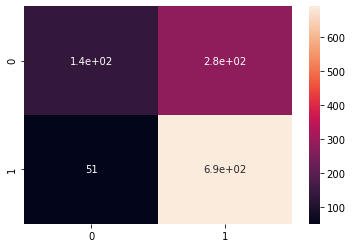

In [64]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm,annot=True)

In [59]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
sentiment_model = MultinomialNB().fit(traindataset, y_train)

In [60]:
y_pred=sentiment_model.predict(testdataset)

In [61]:
accuracy_score(y_pred,y_test)

0.7523727351164797

<AxesSubplot:>

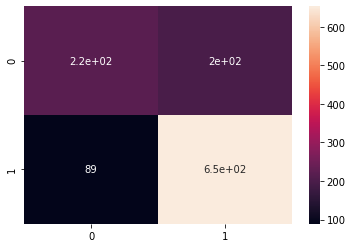

In [63]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

In [65]:
from xgboost import XGBClassifier
ensemble=XGBClassifier(n_estimators=500,n_jobs=10)
ensemble.fit(traindataset,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:28:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=10, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
prediction=ensemble.predict(testdataset)

In [67]:
accuracy_score(y_test,prediction)

0.6885245901639344

<AxesSubplot:>

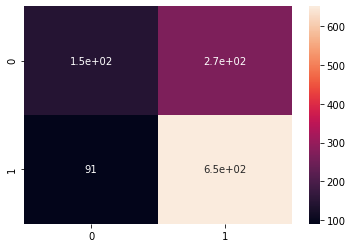

In [69]:
import seaborn as sns
cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm,annot=True)